In [99]:
import datetime
import logging
import math

from src.logger import LoggerConfig

LoggerConfig.setup_logger()

ANALYSIS_START_DATE = datetime.date.fromisoformat("2014-09-17")
ANALYSIS_END_DATE = datetime.date.fromisoformat("2025-05-02")
TOKEN = 'btc'

2025-05-01 14:26:56,496 - root - INFO - Logger configured


In [103]:
from src.data_sources.google_trends import GoogleTrendsDataSource
google_trends_data = GoogleTrendsDataSource.load(
    from_date=ANALYSIS_START_DATE,
    to_date=ANALYSIS_END_DATE,
    keywords=[
        'bitcoin', 'btc', 'ethereum', 'eth', 'crypto',
        'bitcoin price', 'crypto trading', 'crypto price',
        'crypto crash', 'bitcoin crash', 'crypto fear', 'crypto bull run', 'crypto bear market',
        'gold', 'usd', 'usdt', 'usdc',
        'web3', 'nft', 'defi', 'blockchain',
        'binance', 'coinbase', 'crypto.com', 'kraken', 'okx',
        'bitcoin investment',
        'war', 'conflict', 'ETF',
    ]
)
google_trends_data

2025-05-01 14:27:55,731 - root - INFO - Загружаем данные из API
2025-05-01 14:27:56,736 - root - INFO - Собираем тренды для: ['bitcoin', 'btc', 'ethereum', 'eth', 'crypto']


TooManyRequestsError: The request failed: Google returned a response with code 429

In [102]:
from src.data_sources.prices import PricesDataSource
prices_tickers = [
    'BTC-USD',
    'ETH-USD',
    'SOL-USD',
    'BNB-USD',
    'ADA-USD',
    'SPY',  # индекс акций
    'GLD',  # золото
]
if not any([TOKEN.lower() in ticker_.lower() for ticker_ in prices_tickers]):
    logging.error(f"{TOKEN}_ not found in prices")
prices_data = PricesDataSource.load(
    from_date=ANALYSIS_START_DATE,
    to_date=ANALYSIS_END_DATE,
    interval="1d",
    tickers=prices_tickers
)
prices_data

2025-05-01 14:27:11,713 - root - INFO - Загружаем данные из API с разбивкой на части


,date_,sol_usd_open,sol_usd_high,sol_usd_low,sol_usd_close,sol_usd_adj_close,sol_usd_volume,gld_open,gld_high,gld_low,...,spy_low,spy_close,spy_adj_close,spy_volume,btc_usd_open,btc_usd_high,btc_usd_low,btc_usd_close,btc_usd_adj_close,btc_usd_volume
0,2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN,118.949997,119.239998,117.500000,...,199.750000,200.750000,166.454071,151266000.0,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,NaN,NaN,NaN,NaN,NaN,NaN,117.410004,118.089996,117.190002,...,201.100006,201.820007,167.341217,94990000.0,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,117.510002,117.570000,116.720001,...,200.289993,200.699997,167.190460,121649000.0,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3875,2025-04-27,149.289703,150.208725,145.766602,148.245834,148.245834,2.015738e+09,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,94660.906250,95301.203125,93665.398438,93754.843750,93754.843750,18090367764
3876,2025-04-28,148.245163,153.207703,144.891449,147.809937,147.809937,3.819503e+09,304.149994,309.109985,302.970001,...,545.020020,550.849976,550.849976,47613800.0,93755.304688,95598.492188,92860.804688,94978.750000,94978.750000,32363449569
3877,2025-04-29,147.809937,150.044189,145.169327,146.427872,146.427872,2.872744e+09,305.809998,306.950012,304.000000,...,548.549988,554.320007,554.320007,47775100.0,94981.859375,95485.414062,93796.632812,94284.789062,94284.789062,25806129921
3878,2025-04-30,146.427490,148.209290,140.712097,147.643204,147.643204,3.017473e+09,304.609985,306.070007,303.440002,...,541.520020,554.539978,554.539978,92678400.0,94286.468750,95249.320312,92979.640625,94207.312500,94207.312500,28344679831


In [72]:
import pandas as pd
import numpy as np
import ta  # если не установлено: pip install ta

# --- 1. Препроцессинг PRICES данных ---
prices = prices_data.copy()
prices['date'] = pd.to_datetime(prices['date'])
prices = prices.sort_values('date')
prices['weekday'] = prices['date'].dt.weekday
prices['is_weekend'] = prices['weekday'].isin([5, 6]).astype(int)
prices['month'] = pd.to_datetime(prices['date']).dt.month

# # --- 2. Препроцессинг Google Trends ---
trends = google_trends_data.copy()
trends['date'] = pd.to_datetime(trends['date'])
trends = trends.sort_values('date')

# Заполняем отсутствующие даты "последним известным значением"
full_dates = pd.DataFrame({'date': pd.date_range(prices['date'].min(), prices['date'].max(), freq='D')})
trends = pd.merge(full_dates, trends, on='date', how='left')
trends = trends.ffill().bfill()

# --- 3. Объединение данных ---
df = pd.merge(prices, trends, on='date', how='left')
# df = prices.copy()

# --- 4. Генерация технических индикаторов ---
OHLCV = ['open', 'close', 'high', 'low', 'volume']
for col in df.columns:
    for price_type in OHLCV:
        if not col.endswith(price_type):
            continue

        ticker_base = col.replace(f"_{price_type}", "")

        if price_type == 'close':
            # 4.1 Скользящие средние
            df[ticker_base+'_ma_5'] = df[ticker_base+'_close'].rolling(window=5, min_periods=1).mean()
            df[ticker_base+'_ma_10'] = df[ticker_base+'_close'].rolling(window=10, min_periods=1).mean()

            # 4.2 Индикатор RSI
            rsi_indicator = ta.momentum.RSIIndicator(close=df[ticker_base+'_close'], window=6)
            df[ticker_base+'_rsi_6'] = rsi_indicator.rsi()
            rsi_indicator = ta.momentum.RSIIndicator(close=df[ticker_base+'_close'], window=12)
            df[ticker_base+'_rsi_12'] = rsi_indicator.rsi()
            rsi_indicator = ta.momentum.RSIIndicator(close=df[ticker_base+'_close'], window=24)
            df[ticker_base+'_rsi_24'] = rsi_indicator.rsi()

            # 4.3 Волатильность
            df[ticker_base+'_volatility_6'] = df[ticker_base+'_close'].rolling(window=6, min_periods=1).std()
            df[ticker_base+'_volatility_12'] = df[ticker_base+'_close'].rolling(window=12, min_periods=1).std()
            df[ticker_base+'_volatility_24'] = df[ticker_base+'_close'].rolling(window=24, min_periods=1).std()

            # 4.4 Процентное изменение цены
            df[ticker_base+'_price_change_1d'] = df[ticker_base+'_close'].pct_change(periods=1)
            df[ticker_base+'_price_change_7d'] = df[ticker_base+'_close'].pct_change(periods=7)
            df[ticker_base+'_price_change_30d'] = df[ticker_base+'_close'].pct_change(periods=30)

            # 4.5 MACD
            df[ticker_base+'_macd_line'] = df[ticker_base+'_close'].ewm(span=12, adjust=False).mean() - df[ticker_base+'_close'].ewm(span=26, adjust=False).mean()
            df[ticker_base+'_macd_signal'] = df[ticker_base+'_macd_line'].ewm(span=9, adjust=False).mean()

        if price_type == 'high':
            df[ticker_base+'_price_high_low_diff'] = df[ticker_base+'_high'] - df[ticker_base+'_low']

        if price_type == 'open':
            df[ticker_base+'_price_open_close_diff'] = df[ticker_base+'_open'] - df[ticker_base+'_close']

important_features_key_words_ = ['close', 'volume', 'rsi', 'macd', 'high', 'low']
def col_is_important(col_):
    for key_word in important_features_key_words_:
        return key_word in col_
important_features = [col for col in df.columns if col_is_important(col)]
lags = [1, 2, 3, 4, 5, 6, 7, 14, 24, 30, 60, 90]  # только короткие лаги
for feature in important_features:
    for lag in lags:
        df[f'{feature}_lag_{lag}'] = df[feature].shift(lag)

# --- 5. Создание целевых переменных (target'ов) ---
df['target_1d'] = (df[f'{TOKEN}_usd_close'].shift(-1) - df[f'{TOKEN}_usd_close']) / df[f'{TOKEN}_usd_close']
df['target_7d'] = (df[f'{TOKEN}_usd_close'].shift(-7) - df[f'{TOKEN}_usd_close']) / df[f'{TOKEN}_usd_close']
df['target_30d'] = (df[f'{TOKEN}_usd_close'].shift(-30) - df[f'{TOKEN}_usd_close']) / df[f'{TOKEN}_usd_close']

# --- 7. Финальная подготовка ---
# Убираем строки с пустыми значениями
df = df.dropna(subset=['target_1d', 'target_7d', 'target_30d'])

# --- 8. Отделяем фичи и таргеты ---
# Теперь все колонки кроме target-ов и даты — это признаки
target_columns = ['target_1d', 'target_7d', 'target_30d']
exclude_columns = ['date', 'target_1d', 'target_7d', 'target_30d']
feature_columns = [col for col in df.columns if col not in exclude_columns]

real_data = df.sort_values('date', ascending=False)
real_data = real_data[['date', 'target_1d', f'{TOKEN}_usd_close']]

features = df[feature_columns]
targets = df[target_columns]


C:\Users\nurla\AppData\Local\Temp\ipykernel_6308\3546510832.py:55: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[ticker_base+'_price_change_1d'] = df[ticker_base+'_close'].pct_change(periods=1)
C:\Users\nurla\AppData\Local\Temp\ipykernel_6308\3546510832.py:56: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df[ticker_base+'_price_change_7d'] = df[ticker_base+'_close'].pct_change(periods=7)
C:\Users\nurla\AppData\Local\Temp\ipykernel_6308\3546510832.py:57: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any n

In [144]:
real_data

,date,target_1d,btc_usd_close
3844,2025-03-27,-0.032393,87177.101562
3843,2025-03-26,0.003179,86900.882812
3842,2025-03-25,-0.006526,87471.703125
3841,2025-03-24,-0.000311,87498.914062
3840,2025-03-23,0.016786,86054.375000
...,...,...,...
4,2014-09-21,0.008352,398.821014
3,2014-09-20,-0.024659,408.903992
2,2014-09-19,0.035735,394.795990
1,2014-09-18,-0.069843,424.440002


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.089447 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125371
[LightGBM] [Info] Number of data points in the train set: 3806, number of used features: 519
[LightGBM] [Info] Start training from score 0.002060
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

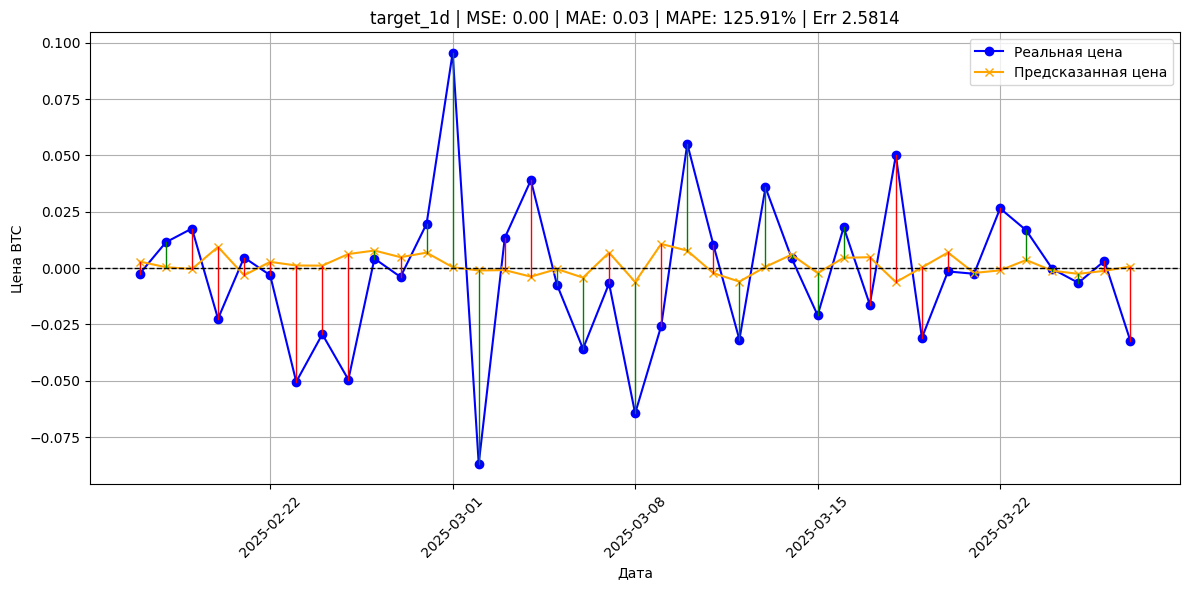

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045079 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125371
[LightGBM] [Info] Number of data points in the train set: 3806, number of used features: 519
[LightGBM] [Info] Start training from score 0.014786
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

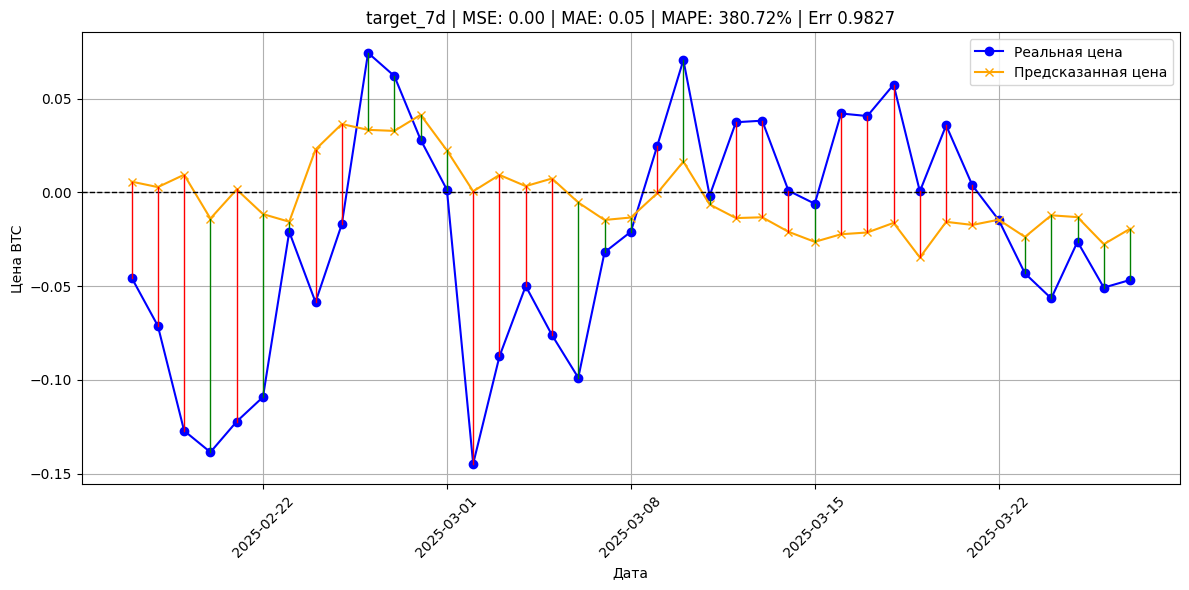

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044569 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 125371
[LightGBM] [Info] Number of data points in the train set: 3806, number of used features: 519
[LightGBM] [Info] Start training from score 0.067967
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

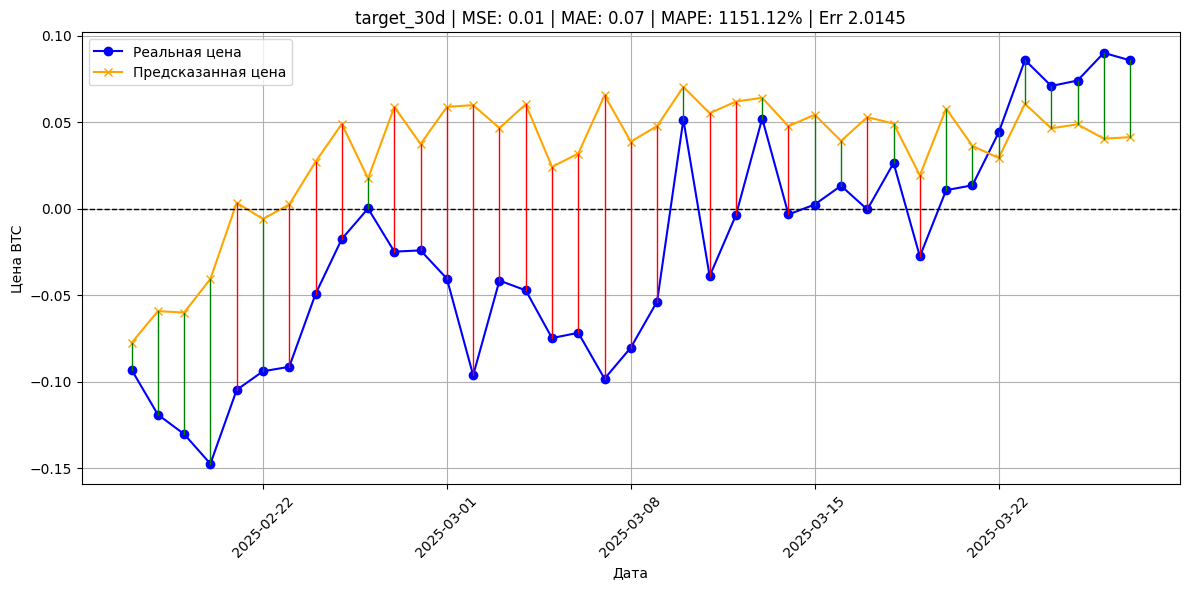

In [76]:
import math

from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

models = {}
mse_scores = {}
mape_scores = {}

# 1. Разделяем данные
X = features.copy()
y = targets.copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, shuffle=False)

# 2. Для каждой цели обучаем свою модель
for target_name in y.columns:
    model = LGBMRegressor(
        n_estimators=400,
        max_depth=8,
        min_child_samples=40,
        learning_rate=0.01,
        colsample_bytree=0.7,  # recommended 0.7
        subsample=0.8,  # recommended 0.8
        reg_alpha=0.5,
        reg_lambda=0.5,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train[target_name])

    y_pred = model.predict(X_test)
    y_pred_price = X_test[f'{TOKEN}_usd_close'].values * (1 + y_pred)

    mse = mean_squared_error(y_test[target_name], y_pred)
    mae = mean_absolute_error(y_test[target_name], y_pred)
    mape = np.mean(np.abs((y_test[target_name] - y_pred) / y_test[target_name])) * 100
    models[target_name] = model
    mse_scores[target_name] = mse
    mape_scores[target_name] = mape

    error_summ = 0
    for real, pred in zip(real_values, pred_values):
        if pred > 0 and real > 0 or pred < 0 and real < 0:
            pass
        error_summ += math.fabs(real - pred)

    # 3. Строим график для каждой цели
    plt.figure(figsize=(12, 6))
    x_dates = df.loc[y_test.index, 'date']

    real_values = y_test[target_name].values
    pred_values = y_pred

    # Основные линии
    plt.plot(x_dates, real_values, label="Реальная цена", marker='o', color='blue')
    plt.plot(x_dates, pred_values, label="Предсказанная цена", marker='x', color='orange')

    # Линия уровня 0
    plt.axhline(0, color='black', linewidth=1, linestyle='--')

    # Цветная визуализация разницы
    for x, real, pred in zip(x_dates, real_values, pred_values):
        if pred > 0 and real > 0 or pred < 0 and real < 0:
            color = 'green'
        else:
            color = 'red'
        plt.plot([x, x], [real, pred], color=color, linestyle='-', linewidth=1)

    plt.title(f"{target_name} | MSE: {mse:.2f} | MAE: {mae:.2f} | MAPE: {mape:.2f}% | Err {error_summ:.4f}")
    plt.xlabel("Дата")
    plt.ylabel(f"Цена {TOKEN.upper()}")
    plt.legend()
    plt.grid(True)

    # Форматирование дат
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.show()

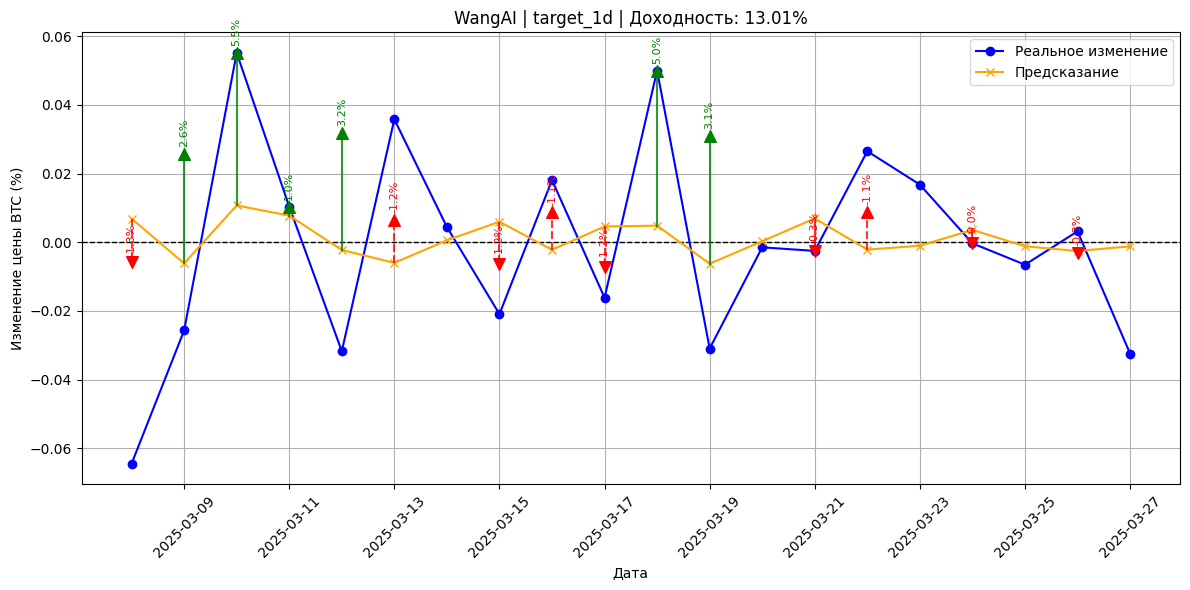

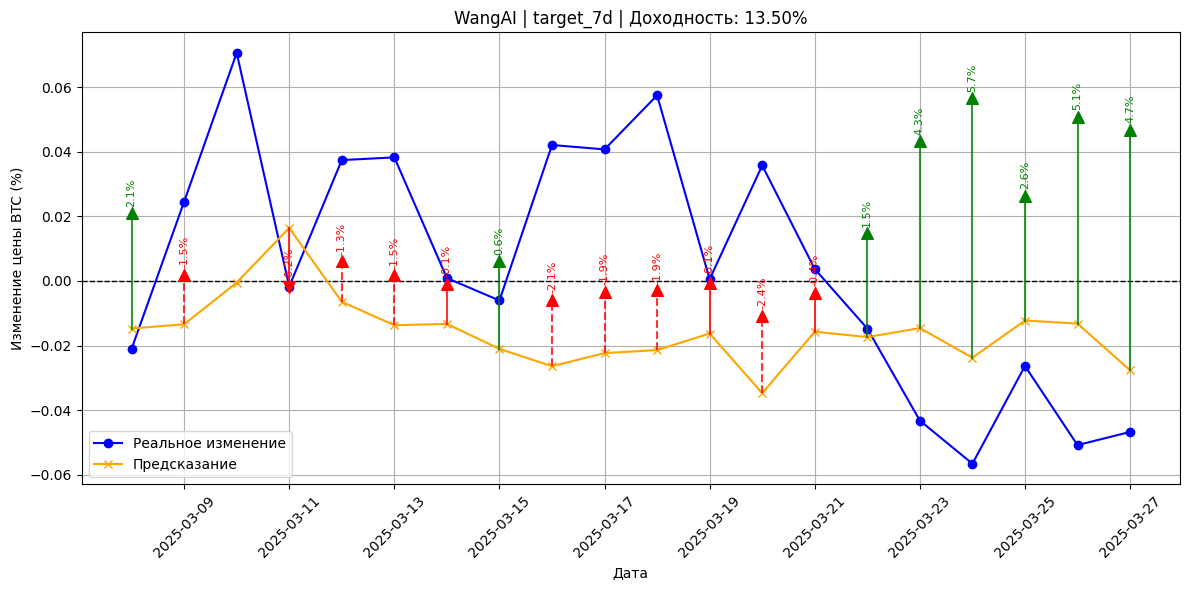

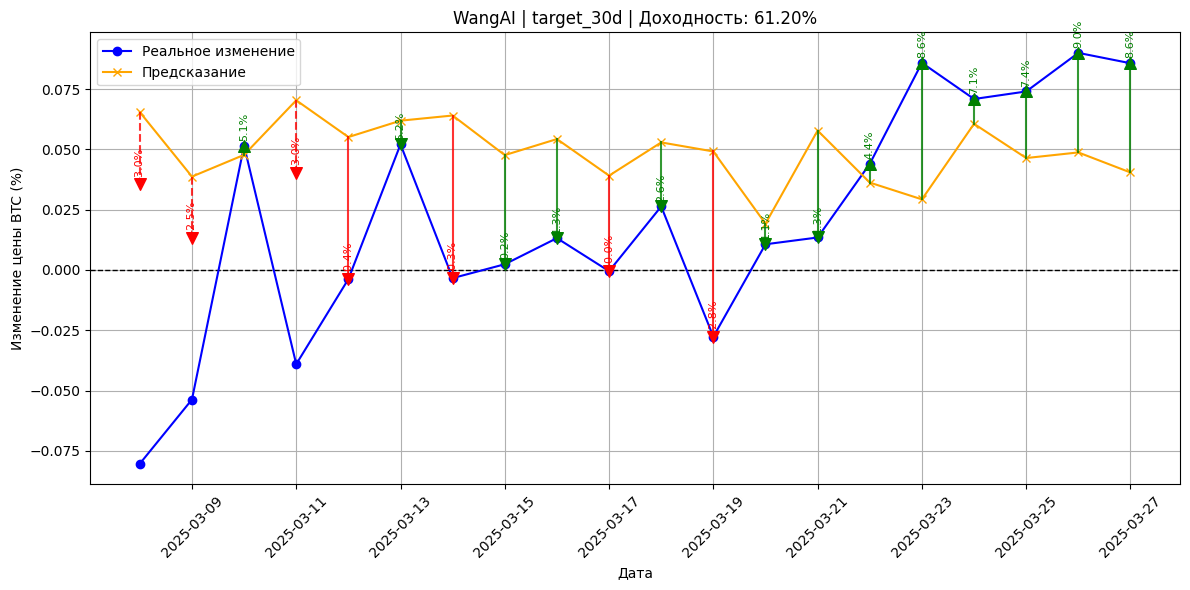

In [109]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def predict(model_: str):
    days_to_predict = 20
    real_price_changes = []
    predicted_price_changes = []
    dates = []
    trade_outcomes = []   # 'profit', 'stop_loss', 'no_trade'
    trade_results = []    # actual % result from trade
    trade_types = []      # 'long', 'short', or 'none'
    exit_points = []      # where the trade exited (real or stop)
    pred_directions = []  # used to determine marker direction

    for i in range(-days_to_predict, 0):
        real_price_change = float(targets.iloc[i][model_])
        predicted_price_change = models[model_].predict(features.iloc[[i-1]])[0]
        real_price_changes.append(real_price_change)
        predicted_price_changes.append(predicted_price_change)
        dates.append(df.iloc[targets.index[i]]['date'])

    start_budget = 1000
    my_budget = start_budget

    threshold_to_trade = 0.002
    min_stop_loss = 0.01
    max_stop_loss = 0.03

    for real, pred in zip(real_price_changes, predicted_price_changes):
        if abs(pred) < threshold_to_trade:
            trade_outcomes.append("no_trade")
            trade_results.append(0)
            trade_types.append("none")
            exit_points.append(0)
            pred_directions.append(0)
            continue

        confidence = min(1.0, abs(pred) / 0.05)
        stop_loss = min_stop_loss + confidence * (max_stop_loss - min_stop_loss)

        if pred > 0:
            # LONG
            trade_types.append("long")
            pred_directions.append(1)
            if real < -stop_loss:
                # Stop-loss triggered
                my_budget -= my_budget * stop_loss
                trade_outcomes.append("stop_loss")
                trade_results.append(-stop_loss)
                exit_points.append(pred - stop_loss)
            else:
                my_budget += my_budget * real
                trade_outcomes.append("profit")
                trade_results.append(real)
                exit_points.append(real)
        else:
            # SHORT
            trade_types.append("short")
            pred_directions.append(-1)
            if real > stop_loss:
                # Stop-loss triggered
                my_budget -= my_budget * stop_loss
                trade_outcomes.append("stop_loss")
                trade_results.append(-stop_loss)
                exit_points.append(pred + stop_loss)
            else:
                my_budget += my_budget * -real
                trade_outcomes.append("profit")
                trade_results.append(-real)
                exit_points.append(-real)

    total_return_percent = (my_budget - start_budget) / start_budget * 100

    # --- Визуализация ---
    plt.figure(figsize=(12, 6))
    plt.axhline(0, color='black', linewidth=1, linestyle='--')

    plt.plot(dates, real_price_changes, label="Реальное изменение", marker='o', color='blue')
    plt.plot(dates, predicted_price_changes, label="Предсказание", marker='x', color='orange')

    for x, pred, result, typ, outcome, exit_pt in zip(dates, predicted_price_changes, trade_results, trade_types, trade_outcomes, exit_points):
        if typ == "none":
            continue

        color = 'green' if result > 0 else 'red'
        linestyle = '--' if outcome == "stop_loss" else '-'

        # Определяем направление маркера (вверх/вниз)
        marker = '^' if exit_pt > pred else 'v'

        # Вертикальная линия сделки
        plt.plot([x, x], [pred, exit_pt], color=color, linestyle=linestyle, alpha=0.8)

        # Маркер выхода
        plt.scatter(x, exit_pt, color=color, marker=marker, s=70, zorder=5)

        # Подпись прибыли/убытка
        plt.text(x, exit_pt + 0.002, f"{result*100:.1f}%", color=color,
                 fontsize=8, ha='center', va='bottom', rotation=90)

    plt.title(f"WangAI | {model_} | Доходность: {total_return_percent:.2f}%")
    plt.xlabel("Дата")
    plt.ylabel(f"Изменение цены {TOKEN.upper()} (%)")
    plt.legend()
    plt.grid(True)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

for target_name in y.columns:
    predict(target_name)

In [108]:
latest_features = features.iloc[[-1]]
for target_name in y.columns:
    predict = models[target_name].predict(latest_features)[0]
    print(target_name, predict)
real_data['target_1d']

target_1d 0.0006927421752982109
target_7d -0.01942260275290473
target_30d 0.04127777941474524


3844   -0.032393
3843    0.003179
3842   -0.006526
3841   -0.000311
3840    0.016786
          ...   
4       0.008352
3      -0.024659
2       0.035735
1      -0.069843
0      -0.071926
Name: target_1d, Length: 3845, dtype: float64

In [68]:
latest_features

,sol_usd_open,sol_usd_high,sol_usd_low,sol_usd_close,sol_usd_adj_close,sol_usd_volume,gld_open,gld_high,gld_low,gld_close,...,eth_usd_adj_rsi_12,eth_usd_adj_rsi_24,eth_usd_adj_volatility_6,eth_usd_adj_volatility_12,eth_usd_adj_volatility_24,eth_usd_adj_price_change_1d,eth_usd_adj_price_change_7d,eth_usd_adj_price_change_30d,eth_usd_adj_macd_line,eth_usd_adj_macd_signal
3843,143.817078,145.368484,136.136353,137.288574,137.288574,3.083071e+09,278.929993,279.019989,277.779999,278.23999,...,44.839376,41.27999,45.86407,60.321148,115.405982,-0.028328,-0.023598,-0.200743,-87.880813,-127.228037


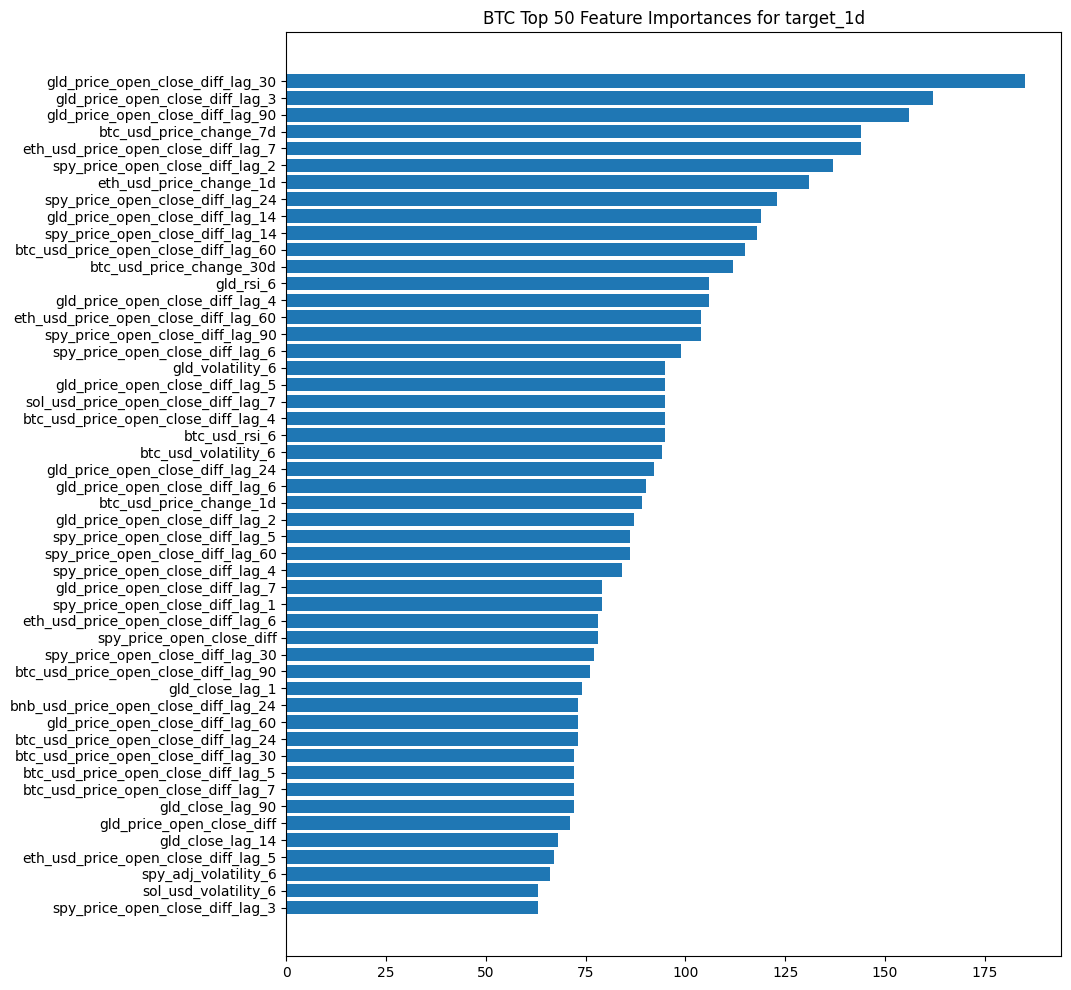

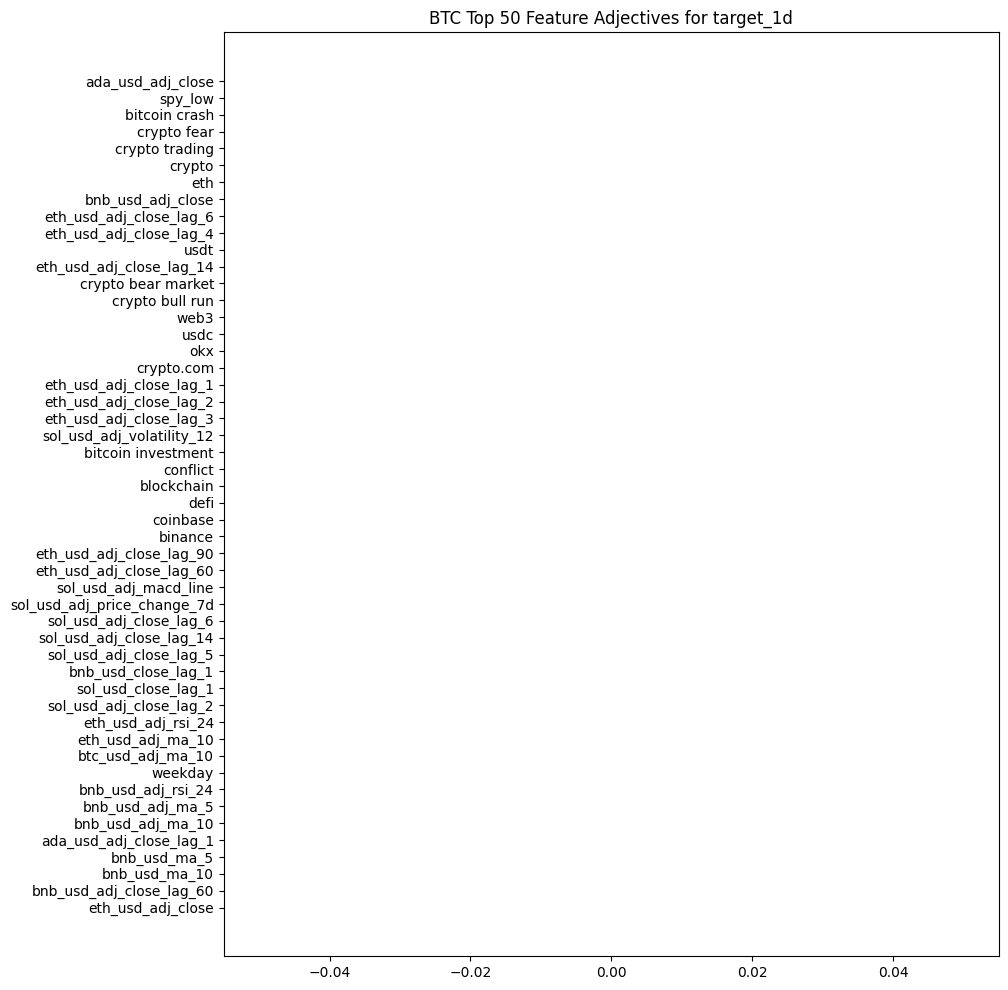

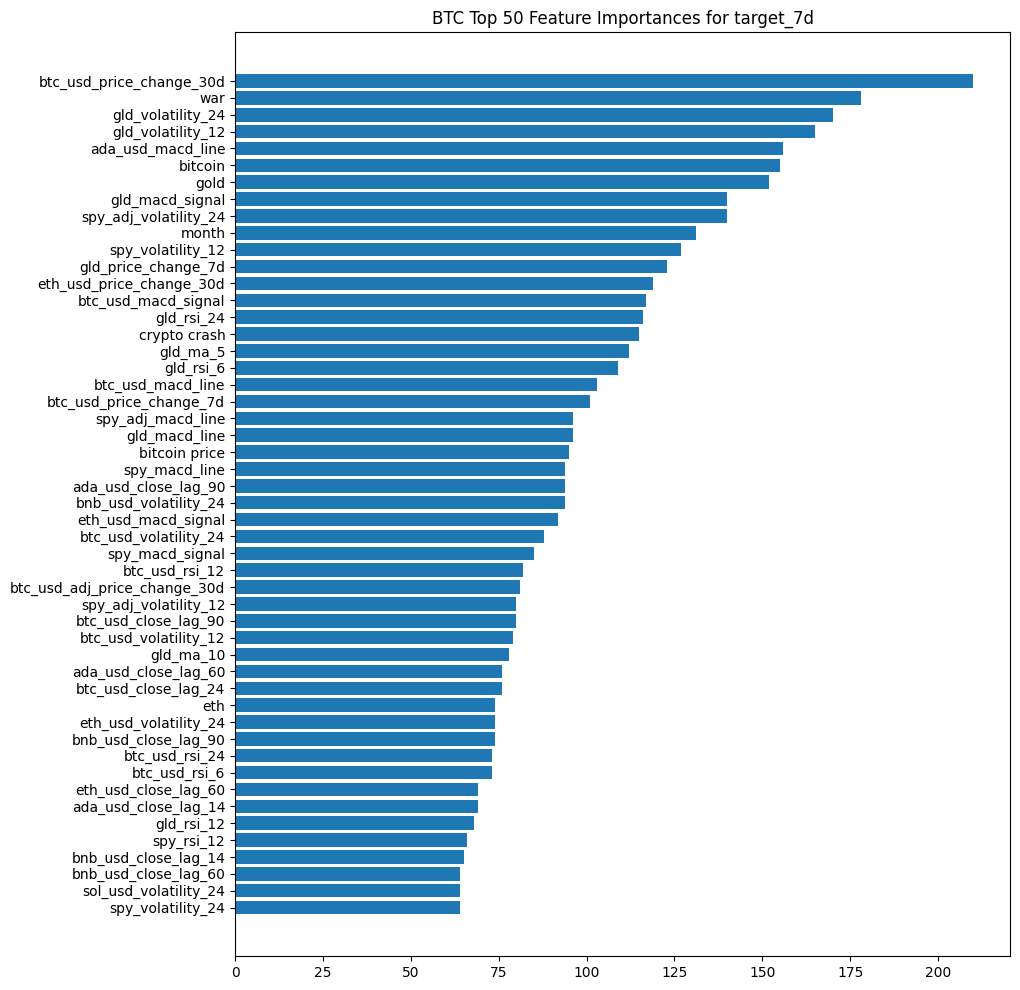

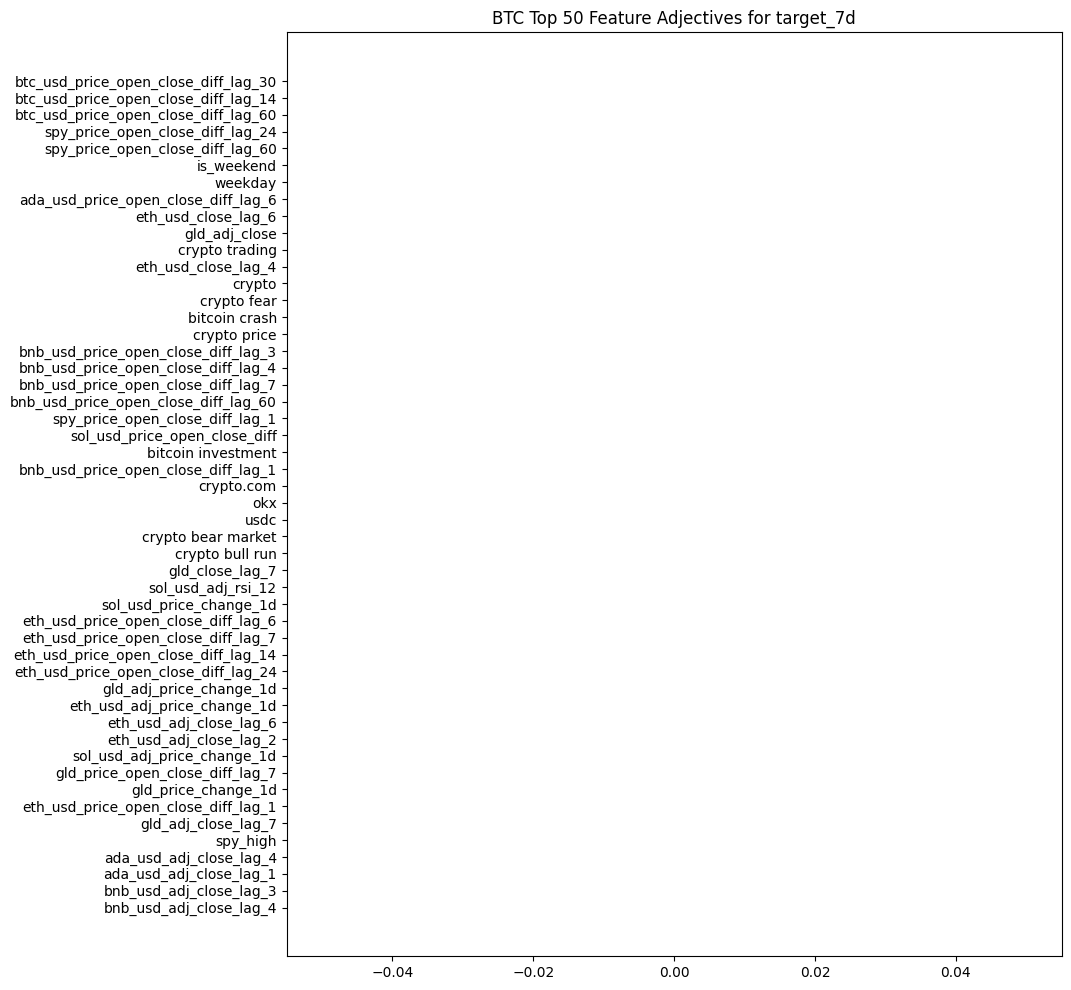

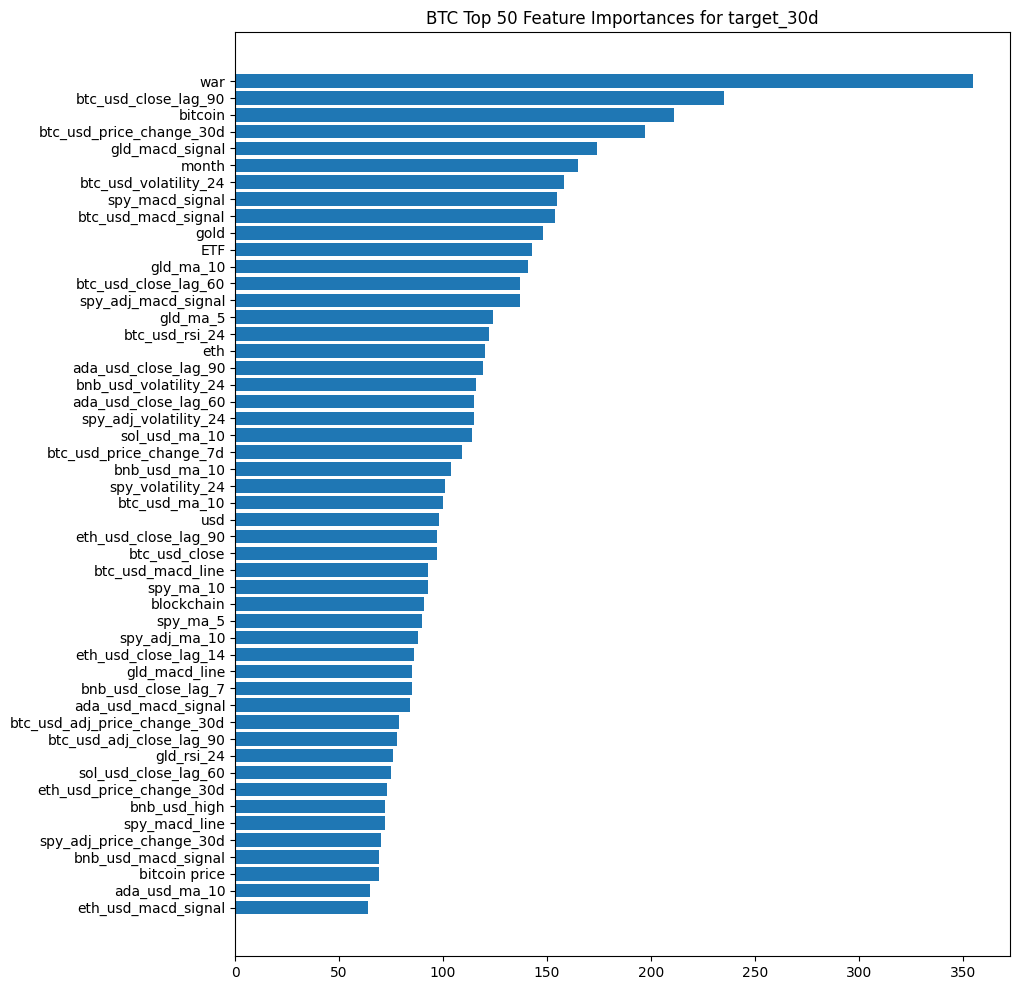

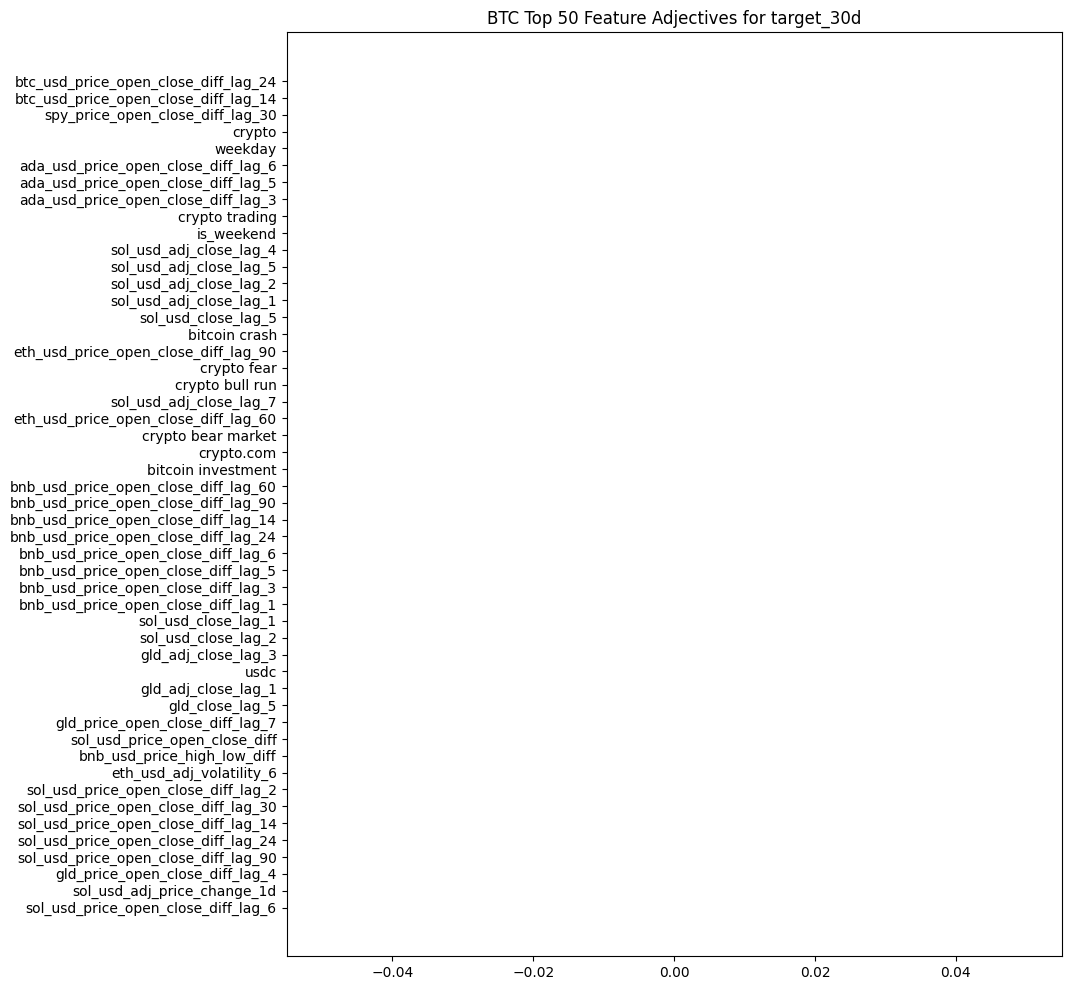

In [107]:
import matplotlib.pyplot as plt

def plt_show(df_: pd.DataFrame, model_name_: str, *, adjective: bool = False):
    lines_count = 50
    plt.figure(figsize=(10, 12))
    plt.barh(df_['feature'][:lines_count], df_['importance'][:lines_count])
    plt.gca().invert_yaxis()
    if adjective:
        plt.title(f"{TOKEN.upper()} Top {lines_count} Feature Adjectives for {model_name_}")
    else:
        plt.title(f"{TOKEN.upper()} Top {lines_count} Feature Importances for {model_name_}")
    plt.show()

def show_importances(model_: str):
    importances = models[model_].feature_importances_
    features_list = features.columns

    # В DataFrame
    features_df = pd.DataFrame({'feature': features_list, 'importance': importances})
    importance_df = features_df.sort_values('importance', ascending=False)
    adjectives_df  = features_df.sort_values('importance', ascending=True)

    # Построить график
    plt_show(importance_df, model_)
    plt_show(adjectives_df, model_, adjective=True)


show_importances('target_1d')
show_importances('target_7d')
show_importances('target_30d')
